Accuracy: 0.918918918918919 (or 91.9 %)


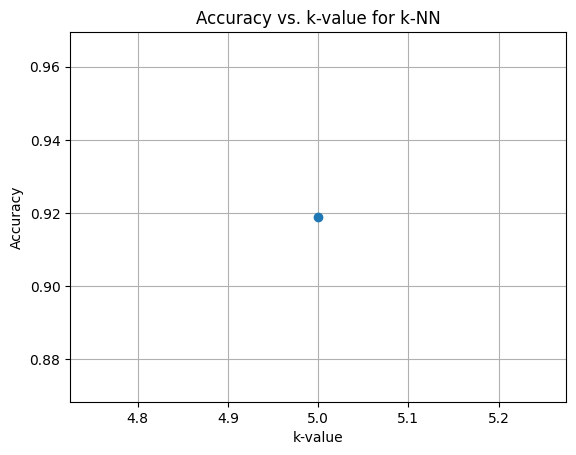

In [7]:
# data preparation steps

# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loading all the observations
observations = pd.read_csv('iris.csv')

# Shuffling all the observations
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
test_examples = observations_test.drop(columns='species').to_numpy()
test_labels = observations_test['species'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
train_examples = observations_train.drop(columns='species').to_numpy()
train_labels = observations_train['species'].to_numpy()

# model training and model evaluation steps

#
model = KNeighborsClassifier(n_neighbors=5)

#
model.fit(train_examples, train_labels)

#
predictions = model.predict(test_examples)

#
correct_predictions = sum(predictions == test_labels)
#
accuracy = correct_predictions / len(test_labels)
#
print("Accuracy:", accuracy, "(or", round(accuracy*100, 1), "%)")

# 
plt.figure()
plt.plot([5], [accuracy], marker='o', linestyle='-')
plt.title('Accuracy vs. k-value for k-NN')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()